In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pyinverse.grid import RegularAxis
from pyinverse.grid import RegularGrid
from pyinverse.ellipse import Ellipse
from pyinverse.phantom import Phantom

In [3]:
#e1 = Ellipse(0.2, 0.5, 0.25, 0, 0, 45)
#e1 = Ellipse(0.2, 0.1, 0.5, 0, 0.5, -45)
#e1 = Ellipse(-.2, .1100, .3100,  .22,    0,    -18)
#e1 = Ellipse(-.02, .1100, .3100,  .22,    0,    -18)
#e1 = Ellipse(1, 0.69/2, 0.92/2, 0.25, 0.15, 25)
#e1 = Ellipse(1, 0.69, 0.92, 0, 0, 0)
#e2 = Ellipse(-0.8, 0.6624, 0.8740, 0, -0.0184, 0)
#e10 = Ellipse(0.1, 0.0230, 0.0460, 0.06, -0.605, 0)

In [4]:
p = Phantom()
ellipse = p._ellipses[2]

In [5]:
ellipse.bounds

(0.07815048031011096,
 -0.2967805818508816,
 0.36184951968988904,
 0.2967805818508816)

In [6]:
N1 = N2 = 256
#N1 = N2 = 32
grid = RegularGrid(RegularAxis.linspace(-1, 1, N1), 
                   RegularAxis.linspace(-1, 1, N2))

In [7]:
X = ellipse.raster(grid, doall=False)

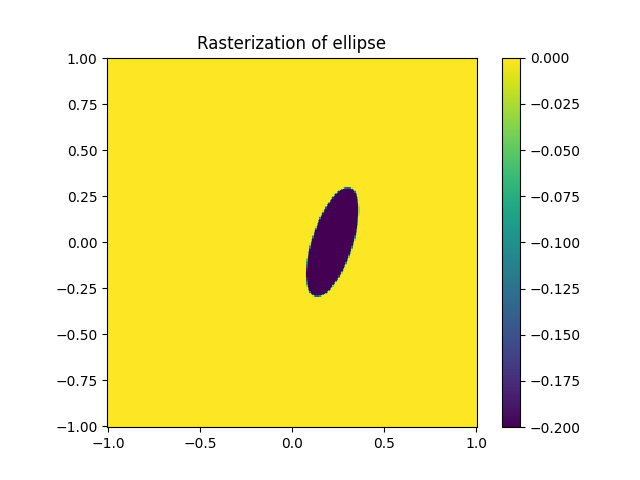

In [8]:
fig, ax = plt.subplots()
im = grid.plot(ax, X)
ax.set_title('Rasterization of ellipse')
fig.colorbar(im);

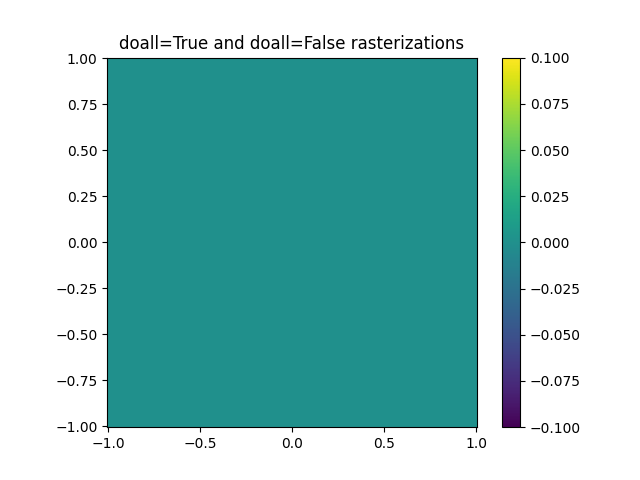

In [9]:
fig, ax = plt.subplots()
im = grid.plot(ax, ellipse.raster(grid, doall=True) - ellipse.raster(grid, doall=False))
ax.set_title('doall=True and doall=False rasterizations')
fig.colorbar(im);

In [10]:
grid_omega, F_X = grid.spectrum(X, real=True)

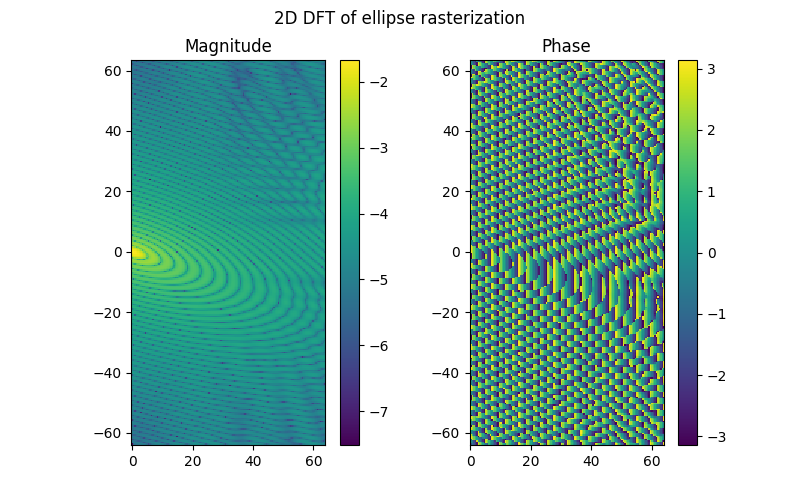

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 5))
im0 = grid_omega.Hz().plot(ax[0], np.log10(np.abs(F_X)))
ax[0].set_title('Magnitude')
fig.colorbar(im0, ax=ax[0])
im1 = grid_omega.Hz().plot(ax[1], np.angle(F_X))
ax[1].set_title('Phase')
fig.colorbar(im1, ax=ax[1]);
fig.suptitle('2D DFT of ellipse rasterization');

In [12]:
F_X_theory = ellipse.fourier_transform_grid(grid_omega.Hz())

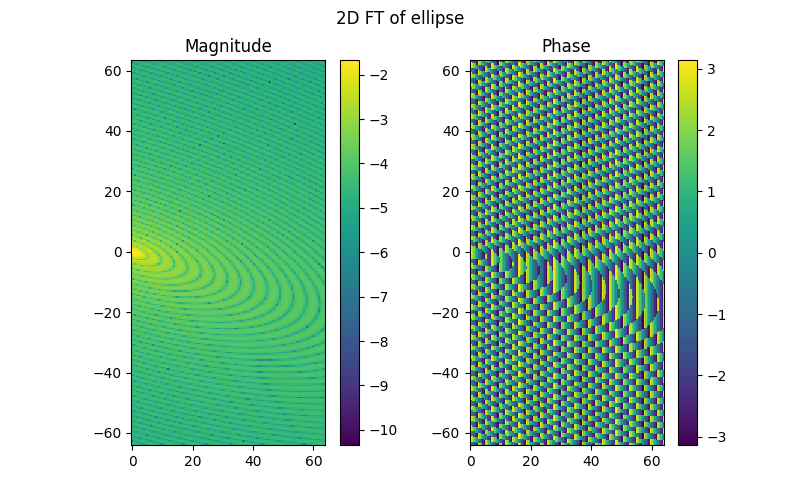

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 5))
im0 = grid_omega.Hz().plot(ax[0], np.log10(np.abs(F_X_theory)))
ax[0].set_title('Magnitude')
fig.colorbar(im0, ax=ax[0])
im1 = grid_omega.Hz().plot(ax[1], np.angle(F_X_theory))
ax[1].set_title('Phase')
fig.colorbar(im1, ax=ax[1]);
fig.suptitle('2D FT of ellipse');

In [14]:
#theta0_rad = 0
#theta0_rad = np.pi/2
theta0_rad = np.pi/8
#theta0_rad = np.pi
theta0_deg = np.degrees(theta0_rad)
axis_theta = RegularAxis.linspace(theta0_deg, 180, 1)
t_max = 1
axis_t = RegularAxis.linspace(-t_max, t_max, 2048)
grid_y = RegularGrid(axis_theta, axis_t)

In [15]:
axis_theta

<RegularAxis x0=22.5 T=157.5 N=1>

In [16]:
p_properties = ellipse.sinogram(grid_y, _direct=False)
p_direct = ellipse.sinogram(grid_y, _direct=True)

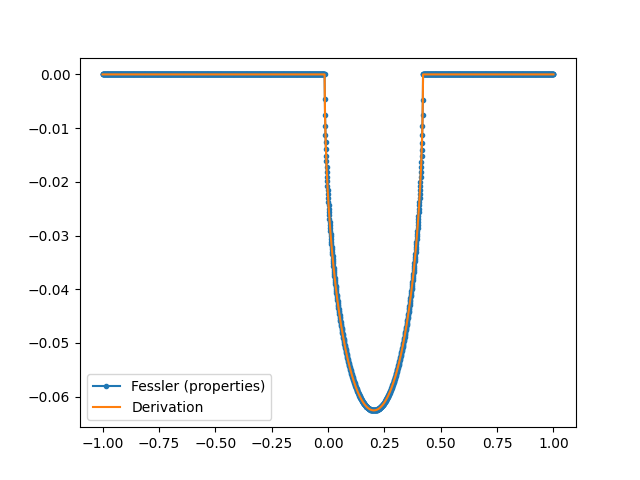

In [17]:
fig, ax = plt.subplots()
ax.plot(axis_t, p_properties, marker='.', label='Fessler (properties)')
ax.plot(axis_t, p_direct, label='Derivation')
ax.legend();

In [18]:
np.allclose(p_properties, p_direct)

True

In [19]:
a = 5
print(1/(2*a))

0.1


In [20]:
p_rect = ellipse.sinogram(grid_y, rect=True, a=a)

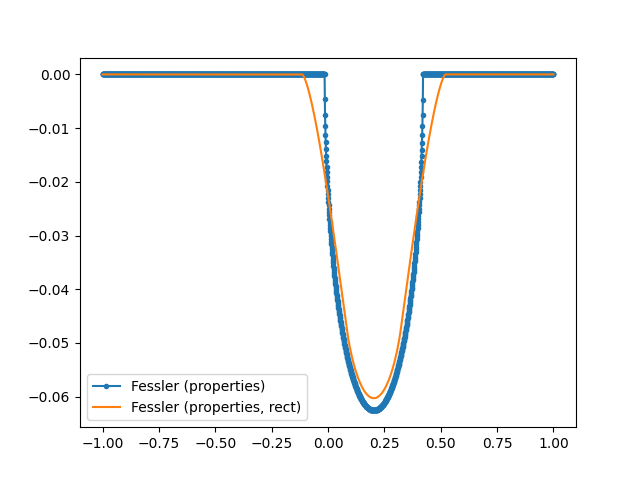

In [21]:
fig, ax = plt.subplots()
ax.plot(axis_t, p_properties, marker='.', label='Fessler (properties)')
ax.plot(axis_t, p_rect, label='Fessler (properties, rect)')
ax.legend();

In [22]:
grid_y_omega, F_proj = grid_y.spectrum(p_properties, axis=0, real=True)

In [23]:
proj_ft = ellipse.proj_ft(grid_y_omega.Hz(axis=0))

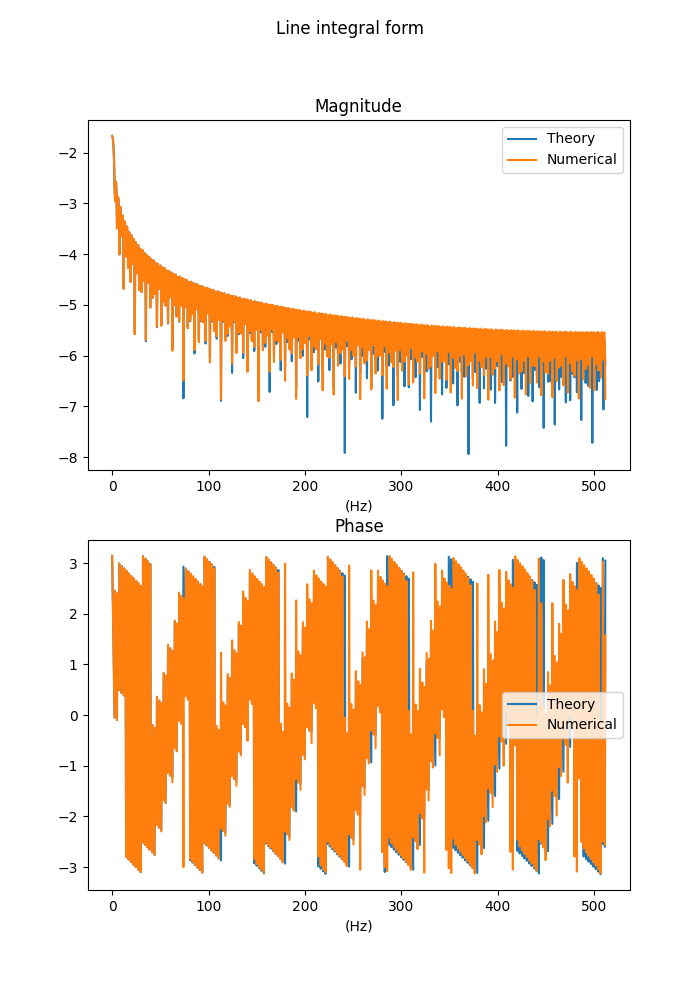

In [24]:
fig, ax = plt.subplots(nrows=2, figsize=(7, 10))
ax[0].plot(grid_y_omega.Hz(axis=0).axis_y, np.log10(np.abs(proj_ft)), label='Theory')
ax[0].plot(grid_y_omega.Hz(axis=0).axis_y, np.log10(np.abs(F_proj)), label='Numerical')
ax[0].set_xlabel('(Hz)')
ax[0].set_title('Magnitude')
ax[0].legend();
ax[1].plot(grid_y_omega.Hz(axis=0).axis_y, np.angle(proj_ft), label='Theory')
ax[1].plot(grid_y_omega.Hz(axis=0).axis_y, np.angle(F_proj), label='Numerical')
ax[1].set_xlabel('(Hz)')
ax[1].set_title('Phase')
ax[1].legend()
fig.suptitle('Line integral form');

In [25]:
grid_y_omega, F_proj_rect = grid_y.spectrum(p_rect, axis=0, real=True)

In [26]:
proj_rect_ft = ellipse.proj_ft(grid_y_omega.Hz(axis=0), rect=True, a=a)

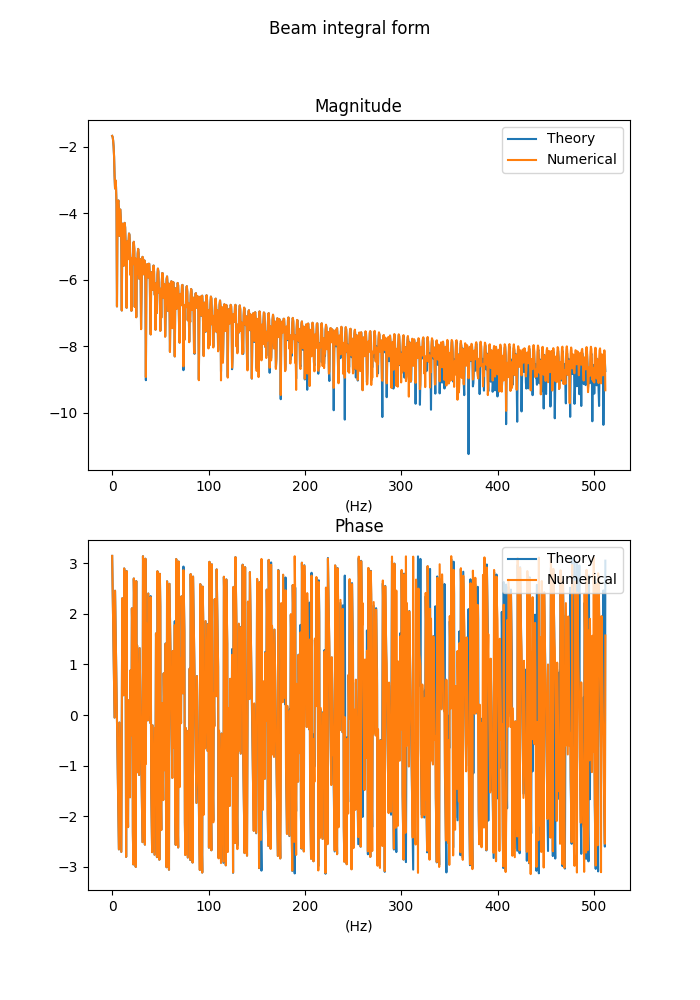

In [27]:
fig, ax = plt.subplots(nrows=2, figsize=(7, 10))
ax[0].plot(grid_y_omega.Hz(axis=0).axis_y, np.log10(np.abs(proj_rect_ft)), label='Theory')
ax[0].plot(grid_y_omega.Hz(axis=0).axis_y, np.log10(np.abs(F_proj_rect)), label='Numerical')
ax[0].set_xlabel('(Hz)')
ax[0].set_title('Magnitude')
ax[0].legend();
ax[1].plot(grid_y_omega.Hz(axis=0).axis_y, np.angle(proj_rect_ft), label='Theory')
ax[1].plot(grid_y_omega.Hz(axis=0).axis_y, np.angle(F_proj_rect), label='Numerical')
ax[1].set_xlabel('(Hz)')
ax[1].set_title('Phase')
ax[1].legend()
fig.suptitle('Beam integral form');